In [3]:
import pandas as pd

In [8]:
df1=pd.read_csv(r"C:\Users\User\Desktop\Health\featured_new.csv")

In [9]:
df1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'Readmitted1',
       'test', 'num_times_admitted', 'num_procedures1', 'lab_percentage',
       'out_percent', 'in_percent', 'emergency_perce

In [10]:
df1.drop(['Unnamed: 0','Unnamed: 0.1','index'],axis=1, inplace=True)

In [11]:
df1.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,lab_percentage,out_percent,in_percent,emergency_percent,diag_1.1,diag_2.1,diag_3.1,diag_1_cat,diag_2_cat,diag_3_cat
0,caucasian,female,75.0,1,3,7,7,cp,surgery-general,64,...,95.522388,100.000000,0.0,0.000000,891.00,815.0,0.0,Missing,Missing,e812
1,caucasian,male,85.0,1,3,7,2,hm,missing,53,...,100.000000,0.000000,0.0,100.000000,426.00,496.0,585.0,Missing,Missing,Missing
2,caucasian,female,85.0,2,3,7,2,mc,missing,15,...,100.000000,0.000000,0.0,100.000000,250.02,276.0,427.0,Missing,Missing,Missing
3,caucasian,female,55.0,1,1,7,2,missing,internalmedicine,63,...,96.923077,NaN,NaN,NaN,578.00,531.0,401.0,Missing,Missing,Missing
4,caucasian,male,65.0,2,13,7,4,md,emergency/trauma,70,...,98.591549,42.857143,0.0,57.142857,853.00,599.0,198.0,Missing,Missing,Missing


In [15]:
df1.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [14]:
import numpy as np
df1 = df1.replace(to_replace =np.nan, value =0) 

In [16]:
from sklearn.preprocessing import LabelEncoder

labels=df1.dtypes[df1.dtypes=="object"].index.tolist()

for i in labels:
    try:
        unique=df1[i].unique().tolist()
        le=LabelEncoder()
        le.fit(unique)
        df1[i]=le.transform(df1[i])
        
    except:
        print(i)

### Time in Hospital

In [17]:
x_train= df1.loc[df1.test==0,df1.columns!='time_in_hospital']
y_train= df1.loc[df1.test==0,'time_in_hospital']

In [31]:
x_test= df1.loc[df1.test==1,df1.columns!='time_in_hospital']
y_test= df1.loc[df1.test==1,'time_in_hospital']

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble as ensemble

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [22]:
randomForest = ensemble.RandomForestRegressor(n_estimators=200, oob_score=True)

In [23]:
randomForest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [24]:
randomForest.base_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [25]:
feature_importance=randomForest.feature_importances_

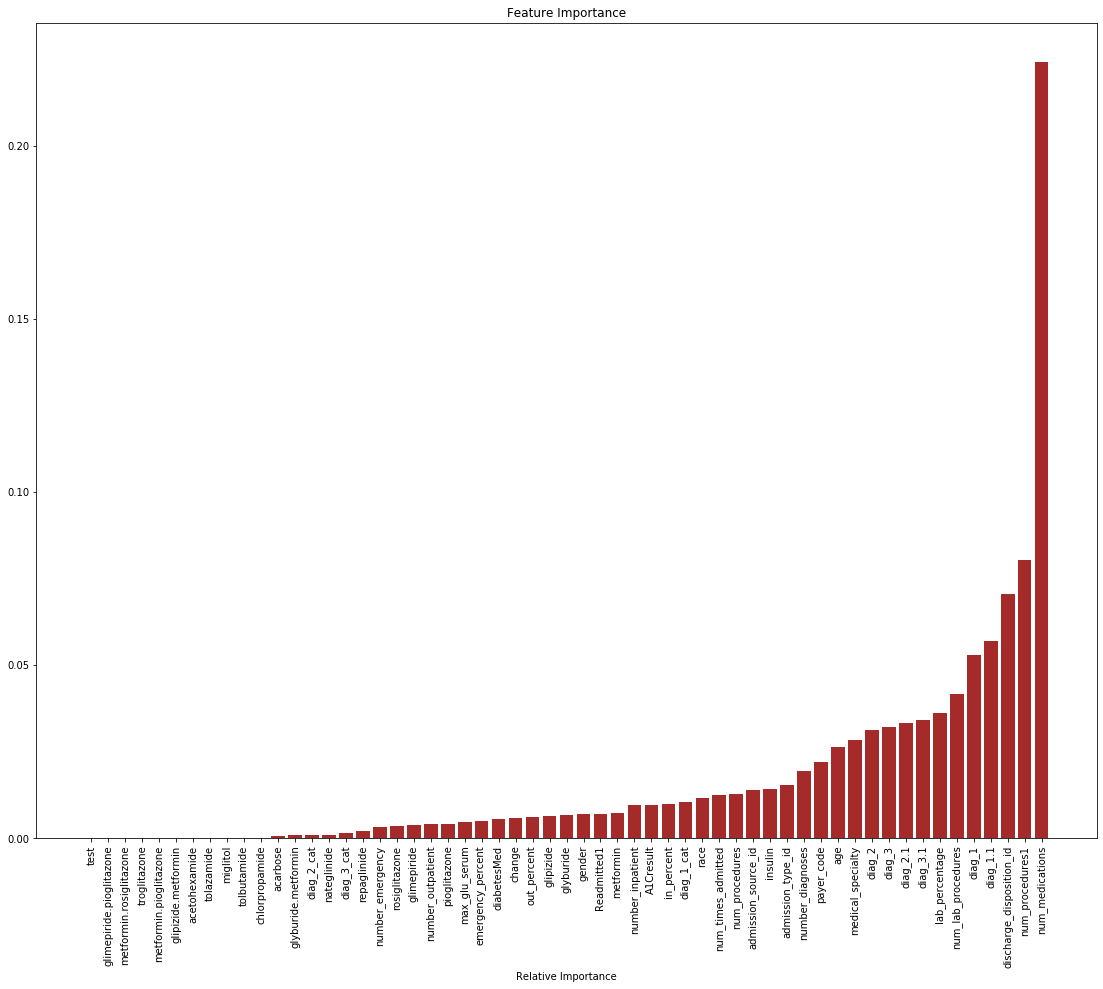

In [29]:
import matplotlib.pyplot as plt
features = x_train.columns
importances = randomForest.feature_importances_
indices = np.argsort(importances)
f = plt.figure(figsize=(19, 15))
plt.title('Feature Importance')

plt.bar(range(len(indices)), importances[indices], color='brown', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices],rotation=90)
plt.xlabel('Relative Importance')
plt.show()

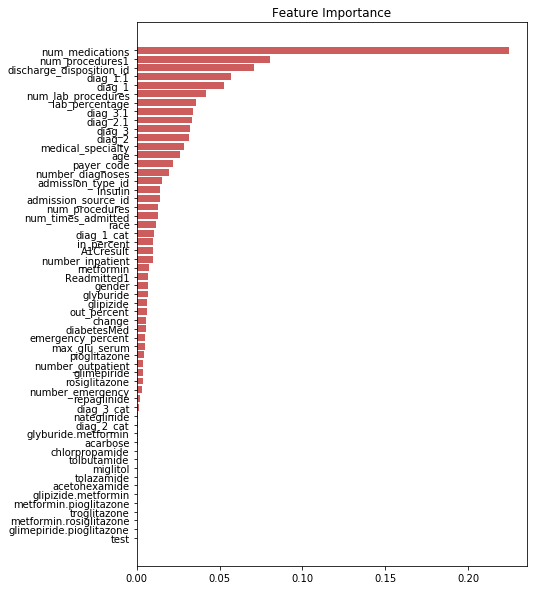

In [40]:
#Calculating feature importances
importances = randomForest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [x_train.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(7,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(x_train.shape[1]),importances[indices],color='indianred', align='center')
plt.yticks(range(x_train.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')

In [32]:
y_pred=randomForest.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_pred,y_test))

print(rmse)

2.2338411507204343


In [ ]:
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(randomForest,param_grid={'n_estimators': [100,300,500]},cv=5, scoring=None, verbose=0, n_jobs=-1)

grid_result=gsc.fit(X,y)
print ("Best Score: {}".format(grid_result.best_score_))
print ("Best params: {}".format(grid_result.best_params_))

### READMISSION

In [51]:
x_train1 = df1.loc[df1.test==0,:].drop(["time_in_hospital","Readmitted1"], axis=1)
y_train1 = df1.loc[df1.test==0,["Readmitted1"]]

x_test1 = df1.loc[df1.test==1,:].drop(["time_in_hospital","Readmitted1"], axis=1)
y_test1 = df1.loc[df1.test==1,["Readmitted1"]]

In [71]:
np.sum(y_test1)/len(y_test1)

Readmitted1    0.458297
dtype: float64

In [52]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=300,oob_score=True)
rf_classifier.fit(x_train1,y_train1)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

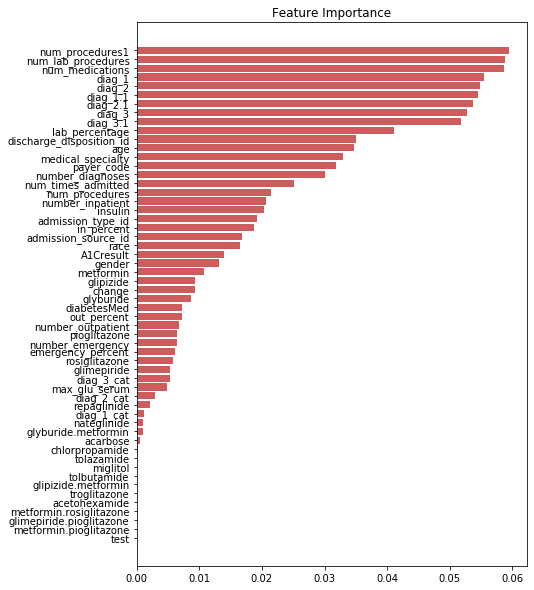

In [53]:
#Calculating feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [x_train1.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(7,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(x_train1.shape[1]),importances[indices],color='indianred', align='center')
plt.yticks(range(x_train1.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')

In [55]:
from sklearn.metrics import classification_report

def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    
    if isinstance(compare, pd.DataFrame):
        compare = compare.to_numpy().reshape(len(predicted),)
    
    # Determine the false positive and true positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()
    
    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    recall=(TP*100)/(FN+TP)
    print()
    print('Precision :- ',round((TP*100)/(FP+TP),2))
    precision=(TP*100)/(FP+TP)
    print()
    print('F1 Score :- ',2*(recall * precision) / (recall + precision))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

In [57]:
pred(rf_classifier,x_test1,y_test1)

CONFUSION MATRIX ------->> 
col_0      0     1
row_0             
0      10166  3616
1       5475  6185

Classification paradox :------->>
Accuracy :-  64.27

Specificity //  True Negative Rate :-  73.76

Sensivity // True Positive Rate // Recall :-  53.04

Precision :-  63.11

F1 Score :-  57.63943898234005

False Negative Rate :-  46.96

False Postive Rate :-  26.24

              precision    recall  f1-score   support

           0       0.65      0.74      0.69     13782
           1       0.63      0.53      0.58     11660

    accuracy                           0.64     25442
   macro avg       0.64      0.63      0.63     25442
weighted avg       0.64      0.64      0.64     25442



In [70]:
from xgboost import XGBClassifier

#x_train_res2 = pd.DataFrame(x_train_res,columns=x_train.columns)

XGB_model = XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None,scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1)

XGB_model.fit(x_train1, y_train1)
pred(XGB_model,x_test1,y_test1)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CONFUSION MATRIX ------->> 
col_0      0     1
row_0             
0      10338  3444
1       5728  5932

Classification paradox :------->>
Accuracy :-  63.95

Specificity //  True Negative Rate :-  75.01

Sensivity // True Positive Rate // Recall :-  50.87

Precision :-  63.27

F1 Score :-  56.398554858338095

False Negative Rate :-  49.13

False Postive Rate :-  24.99

              precision    recall  f1-score   support

           0       0.64      0.75      0.69     13782
           1       0.63      0.51      0.56     11660

    accuracy                           0.64     25442
   macro avg       0.64      0.63      0.63     25442
weighted avg       0.64      0.64      0.63     25442



In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'min_child_weight': [1,5,10,15,20],
              'silent': [1],
              'colsample_bytree': [0.6,0.8,1],
              'n_estimators': range(50, 300, 50), #number of trees, change it to 1000 for better results
              'seed': [1337]}

clf = GridSearchCV(XGB_model, parameters, n_jobs=5, cv=StratifiedKFold(shuffle=True),scoring=None,verbose=0, refit=True)
clf.fit(x_train1,y_train1)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, obj...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'learning_rate': [0.05, 0.1],
                         'min_child_weight': [1, 5, 10, 15, 20],
                    

In [64]:
y_train1

,Readmitted1
0,0
1,1
2,1
3,0
4,1
5,0
6,0
7,0
8,1
9,1


In [ ]:
# from sklearn.metrics import f1_score

# y_pred=rf_model.predict(x_test)

# f1_score(y_test,y_pred)